In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
import time
%matplotlib inline

In [2]:
class NeuralNetwork:

    # INITIALIZE neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #  set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #   w11 w22
        #   w12 w22 

        # Initial random weights simple approach
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.wih = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        # more sophisticated initial weights based off the std of the size of the network
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # Learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # TRAIN the neural network
    def train(self, input_list, target_list):

        # convert inputs lst to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # claculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emering form final output layer
        final_outputs = self.activation_function(final_inputs)

        # ERRORS 
        # error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # UPDATE WEIGHTS
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose(hidden_outputs)
            )
        # updates the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
            numpy.transpose(inputs)
            ) 

    # QUERY the neural network
    def query(self, inputs_list):
        #INPUTS
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T 

        # HIDDEN LAYER
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # OUTPUT LAYER
        # calculate the signals into the final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
        

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# best learning rate is 0.2
learning_rate = 0.2

#  create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
# load the mnits training data CSV file into a list
# training_data_file = open("data/mnist_train_100.csv", "r")
training_data_file = open("data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(training_data_list) > 0:
    training_data_list = training_data_list[1:]

In [5]:
# train the neural network

def train_network(network):
    for record in training_data_list:
        # split the record by the "," commans
        all_values = record.split(",")
    
        # scale and shift the inputs
        input_values = numpy.asarray(all_values[1:]).astype(numpy.float32)
        inputs = (input_values/255.0 *0.99) +0.01
    
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) +0.01
    
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        network.train(inputs, targets)

# epochs is the numbr of times the training data set is used for training
epochs = 2

for e in range(epochs):
    # go through all records in the training dataset
    train_network(n)



In [6]:
# load the mnist test data CSV file into a list
# test_data_file = open("data/mnist_test_10.csv", "r")
test_data_file = open("data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(test_data_list) > 0:
    test_data_list = test_data_list[1:]

In [7]:
# get the first test record
all_test_values = test_data_list[0].split(",")
# print the label
print(all_test_values[0])


7


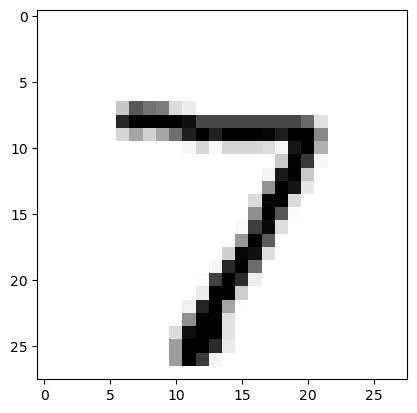

In [8]:
test_image_array = numpy.asarray(all_test_values[1:]).reshape((28, 28))
test_image_array = test_image_array.astype(numpy.float32)
matplotlib.pyplot.imshow(test_image_array, cmap="Greys", interpolation="None")
matplotlib.pyplot.show()

In [9]:

all_test_values_1 = numpy.asarray(all_test_values[1:]).astype(numpy.float32)


scaled_test_input = (all_test_values_1 / 255.0 * 0.99) + 0.01

# predict
n.query(scaled_test_input)


array([[3.79948774e-03],
       [5.12187556e-03],
       [1.82970788e-02],
       [2.08248711e-03],
       [5.39667686e-04],
       [1.17411530e-02],
       [4.44696963e-03],
       [9.98364586e-01],
       [2.70624896e-03],
       [3.17514670e-03]])

In [10]:
# test neural network

def test_network(network, scores):
    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the "," commas
        all_values = record.split(",")
        # correct answer is first value
        correct_label = int(all_values[0])
        # print(correct_label, "correct label")
        # scale and shift the inputs
        input = numpy.asarray(all_values[1:]).astype(numpy.float32)
        inputs = (input /255.00 * 0.99) + 0.01
        # query the network
        outputs = network.query(inputs)
        #  the index of the highest value corresponds to the label 
        label = numpy.argmax(outputs)
        # print(label, "networks answer")
        # append correct or incorrect to list
        if(label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scores.append(1)
        else:
            # networks answer doesn't match correct answer, add 0 to scorecard
            scores.append(0)

# scorecard for how well the network performs, initially empty 
scorecard = []

test_network(n, scorecard)


In [11]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
# # calculate the performance score, the fraction of correct answers 
# scorecard_array = numpy.asarray(scorecard)
# print("performance = ", scorecard_array.sum() / scorecard_array.size)

In [13]:
# TODO: run for different learning rates, and for different epoch sizes, to see the different results 
# TODO: run for different hidden layer sizes to see the learning capacity [3:300]

def run_experiment( hidden_nodes, learning_rate, epochs):
    '''
    runs a neural network training and testing experiment with given hyperparameters
    returns findal accuracy 
    '''
    print("---Running Experiemnt ---")
    print(f"Config: LR={learning_rate:.2f}, Epochs={epochs}, HiddenNodes={hidden_nodes}")

    input_nodes = 784
    output_nodes = 10
    start_time = time.time()

    nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

    # training
    for epoch in range(epochs):
        print(f"Epoch {epoch+1} of {epochs}...")
        train_network(nn)

    # test
    scorecard = []
    test_network(nn, scorecard)

    scorecard_array = numpy.asarray(scorecard)
    performance = scorecard_array.sum() /scorecard_array.size
    end_time = time.time()

    print(f"Performance: {performance:.4f} (took {end_time - start_time:.2f} seconds)")
    return performance

In [14]:
# plot results

def plot_performance(x, y, title):
    matplotlib.pyplot.figure(figsize=(10, 6))
    matplotlib.pyplot.plot(x, y, marker="o")
    matplotlib.pyplot.title(f"NN performance vs. {title}")
    matplotlib.pyplot.xlabel(title)
    matplotlib.pyplot.xlabel("Accuracy")
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.xticks(x)
    matplotlib.pyplot.show()


In [15]:
# Parameter setup

# Default values for parameters not being varied in a specific experiment
default_learning_rate = 0.2
default_epochs = 1 # Reduced for quicker iterations, feel free to increase
default_hidden_nodes = 100 


--- Learning Rate ---
---Running Experiemnt ---
Config: LR=0.01, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9213 (took 19.13 seconds)
---Running Experiemnt ---
Config: LR=0.05, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9445 (took 18.85 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9497 (took 19.03 seconds)
---Running Experiemnt ---
Config: LR=0.20, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9476 (took 18.87 seconds)
---Running Experiemnt ---
Config: LR=0.30, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9393 (took 19.13 seconds)
---Running Experiemnt ---
Config: LR=0.40, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9320 (took 19.29 seconds)
---Running Experiemnt ---
Config: LR=0.50, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9262 (took 19.26 seconds)
---Running Experiemnt ---
Config: LR=0.60, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performanc

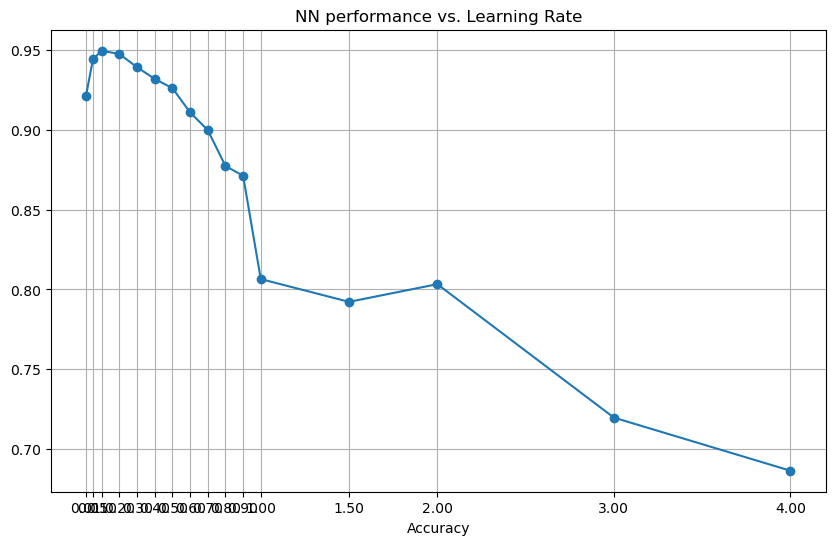

In [ ]:
# Compare Learning rate
print("\n--- Learning Rate ---")
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 4.0]
lr_performances = []

for lr in learning_rates:
    acc = run_experiment(default_hidden_nodes, lr, default_epochs)
    lr_performances.append(acc)



In [ ]:
plot_performance(learning_rates, lr_performances, "Learning Rate" )

In [45]:
def getBestParam( param_list, performance_list):
    return param_list[performance_list.index(max(performance_list))]

def printBestParm(param, param_list, performance_list):
    print(f"\nBest {param} Size found: {getBestParam(param_list, performance_list)} with accuracy: {max(performance_list):.4f}")

In [ ]:

# Get the learning rate that corresponds to that maximum performance
best_learning_rate = learning_rates[lr_performances.index(max(lr_performances))]




Best learning rate Size found: 0.1 with accuracy: 0.9497


---Running Experiemnt ---
Config: LR=0.10, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9519 (took 19.22 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=2, HiddenNodes=100
Epoch 1 of 2...
Epoch 2 of 2...
Performance: 0.9667 (took 36.05 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=3, HiddenNodes=100
Epoch 1 of 3...
Epoch 2 of 3...
Epoch 3 of 3...
Performance: 0.9638 (took 54.11 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=4, HiddenNodes=100
Epoch 1 of 4...
Epoch 2 of 4...
Epoch 3 of 4...
Epoch 4 of 4...
Performance: 0.9680 (took 72.83 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=5, HiddenNodes=100
Epoch 1 of 5...
Epoch 2 of 5...
Epoch 3 of 5...
Epoch 4 of 5...
Epoch 5 of 5...
Performance: 0.9647 (took 90.16 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=6, HiddenNodes=100
Epoch 1 of 6...
Epoch 2 of 6...
Epoch 3 of 6...
Epoch 4 of 6...
Epoch 5 of 6...
Epoch 6 of 6...
Performance: 0.9644 (took 105.09 seconds)
---

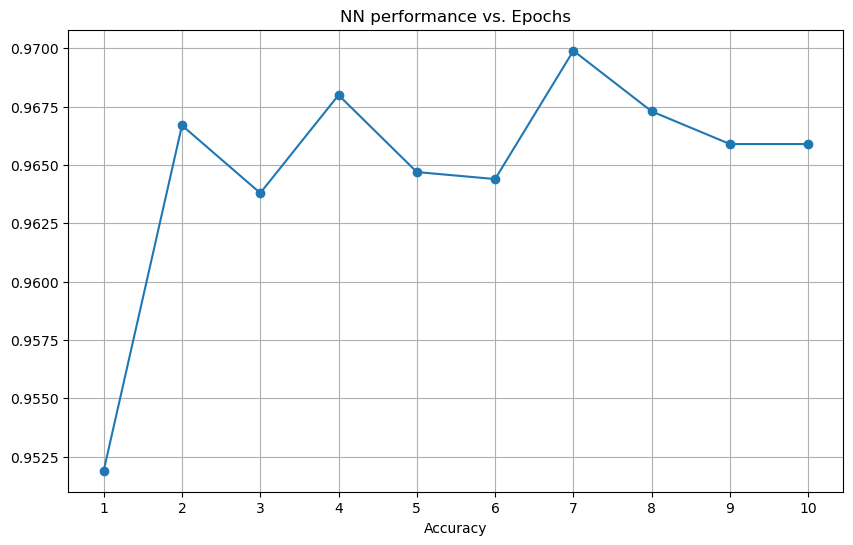

In [18]:
# compare epoch size results
epoch_sizes = list(range(1, 11))
epcoh_performances = []

for epoch in epoch_sizes:
    acc = run_experiment(default_hidden_nodes, best_learning_rate, epoch)
    epcoh_performances.append(acc)

plot_performance(epoch_sizes, epcoh_performances, "Epochs" )

In [47]:
best_epoch_size = getBestParam(epoch_sizes, epcoh_performances)
printBestParm("epoch", epoch_sizes, epcoh_performances)



Best epoch Size found: 7 with accuracy: 0.9699


In [48]:
hidden_layer_sizes = []
val = 3
while val <= 300:
    hidden_layer_sizes.append(val)
    val *= 3

if 100 not in hidden_layer_sizes:
    hidden_layer_sizes.append(100)
hidden_layer_sizes.sort()

hidden_layer_performances = []

for hs in hidden_layer_sizes:
    acc = run_experiment(hs, best_learning_rate, best_epoch_size)
    hidden_layer_performances.append(acc)

---Running Experiemnt ---
Config: LR=0.10, Epochs=7, HiddenNodes=3
Epoch 1 of 7...
Epoch 2 of 7...
Epoch 3 of 7...
Epoch 4 of 7...
Epoch 5 of 7...
Epoch 6 of 7...
Epoch 7 of 7...
Performance: 0.3030 (took 91.96 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=7, HiddenNodes=9
Epoch 1 of 7...
Epoch 2 of 7...
Epoch 3 of 7...
Epoch 4 of 7...
Epoch 5 of 7...
Epoch 6 of 7...
Epoch 7 of 7...
Performance: 0.8936 (took 99.34 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=7, HiddenNodes=27
Epoch 1 of 7...
Epoch 2 of 7...
Epoch 3 of 7...
Epoch 4 of 7...
Epoch 5 of 7...
Epoch 6 of 7...
Epoch 7 of 7...
Performance: 0.9356 (took 110.54 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=7, HiddenNodes=81
Epoch 1 of 7...
Epoch 2 of 7...
Epoch 3 of 7...
Epoch 4 of 7...
Epoch 5 of 7...
Epoch 6 of 7...
Epoch 7 of 7...
Performance: 0.9641 (took 113.29 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=7, HiddenNodes=100
Epoch 1 of 7...
Epoch 2 of 7...
Epoch 3 of 7...

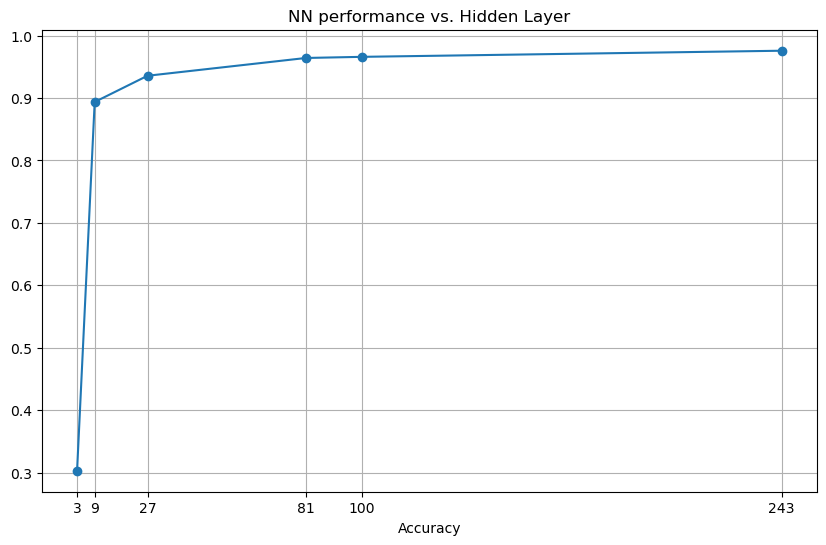

In [49]:

plot_performance(hidden_layer_sizes, hidden_layer_performances, "Hidden Layer" )

In [50]:
best_hidden_layer_size = getBestParam(hidden_layer_sizes, hidden_layer_performances)
printBestParm("Hidden Layer", hidden_layer_sizes, hidden_layer_performances)


Best Hidden Layer Size found: 243 with accuracy: 0.9757
